In [2]:
dir = 'D:/projects/datascience/bfu-ml-labs/lab_3.1'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mtr

In [8]:
iris = datasets.load_iris(as_frame=True)
df = iris.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
def linplot(f1name, f2name):
    plt.figure(figsize=(10, 5))
    for species_id, color in zip([0, 1, 2], ['red', 'green', 'blue']):
        subset = df[df['target'] == species_id]
        plt.scatter(subset[[f1name]], subset[[f2name]], color=color, label=iris.target_names[species_id])
    plt.xlabel(f1name)
    plt.ylabel(f2name)
    plt.legend()
    plt.title('Iris')
    plt.show()

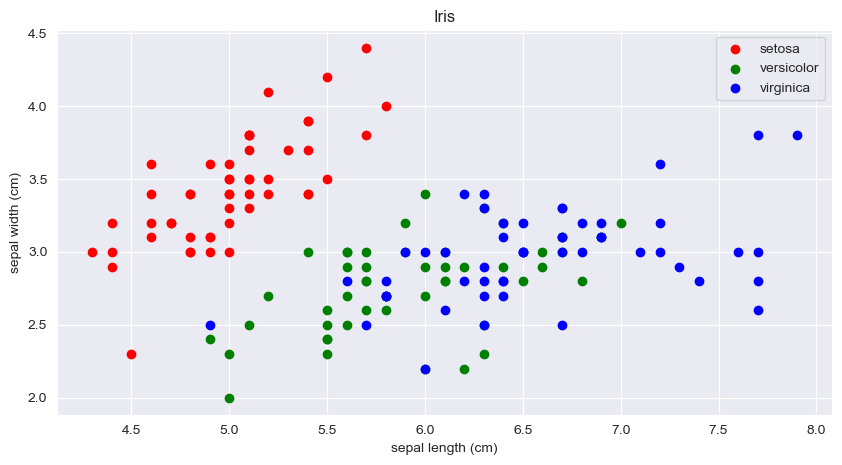

In [53]:
linplot('sepal length (cm)', 'sepal width (cm)')

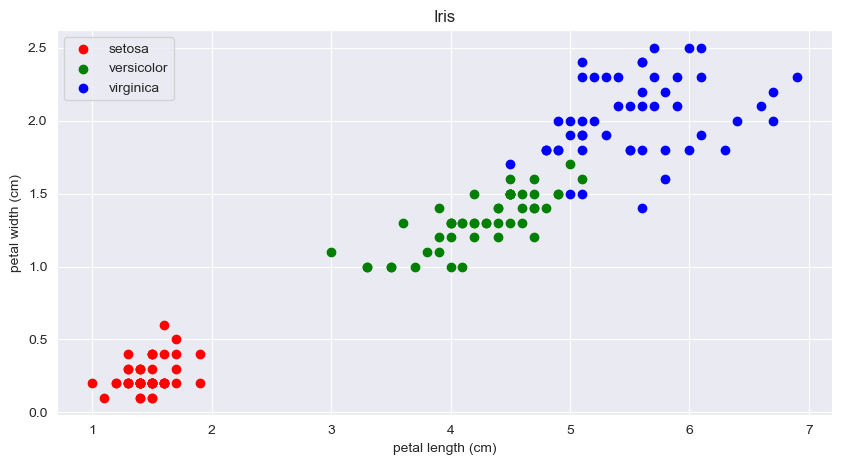

In [54]:
linplot('petal length (cm)', 'petal width (cm)')

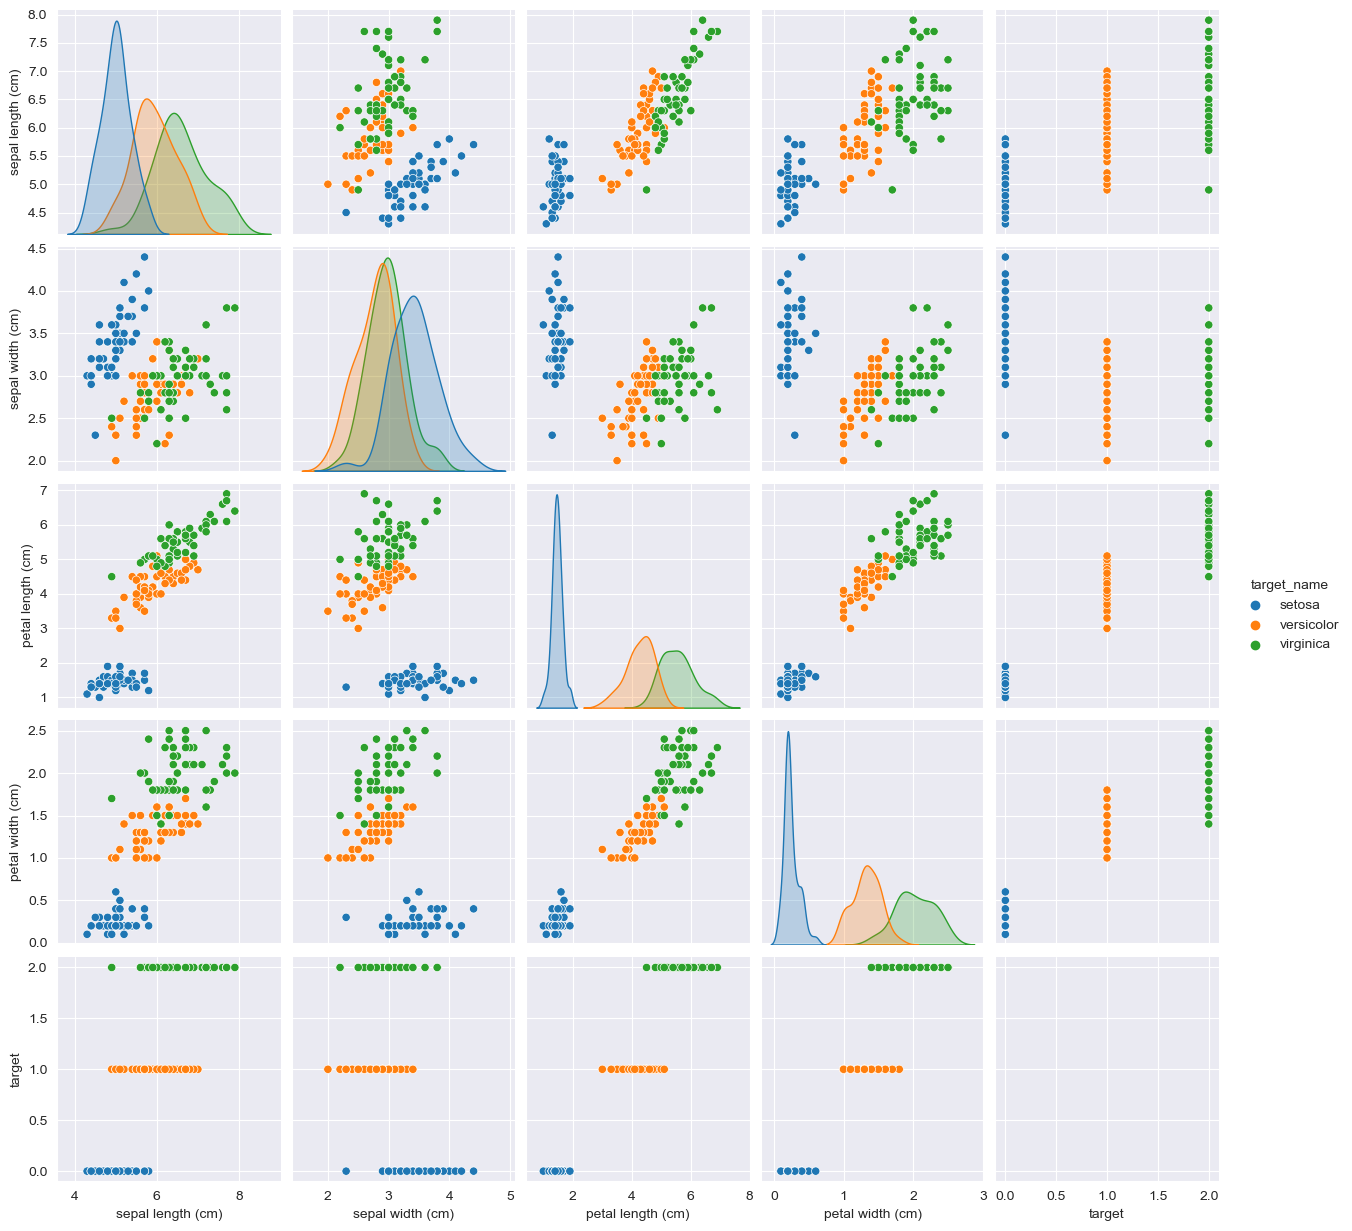

In [39]:
df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})
sns.pairplot(df, hue='target_name')

In [43]:
df1 = df[df['target_name'].isin(['setosa', 'versicolor'])]
df2 = df[df['target_name'].isin(['virginica', 'versicolor'])]
df1.shape, df2.shape

((100, 6), (100, 6))

In [46]:
df1_train, df1_test = train_test_split(df1, test_size=0.3)
df2_train, df2_test = train_test_split(df2, test_size=0.3)
df1_train.shape, df1_test.shape, df2_train.shape, df2_test.shape

((70, 6), (30, 6), (70, 6), (30, 6))

In [47]:
from sklearn.linear_model import LogisticRegression

In [103]:
def experiment(df_train, df_test):
    model = LogisticRegression(random_state=123)
    features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    X_train = df_train[features]
    X_test = df_test[features]
    y_train = df_train['target']
    y_test = df_test['target']
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(mtr.classification_report(y_test, y_pred))

In [105]:
experiment(df1_train, df1_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [106]:
experiment(df2_train, df2_test)

              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [107]:
from sklearn.datasets import make_classification

In [130]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, random_state=1, n_clusters_per_class=1)
type(X), X.shape, type(y), y.shape

(numpy.ndarray, (1000, 2), numpy.ndarray, (1000,))

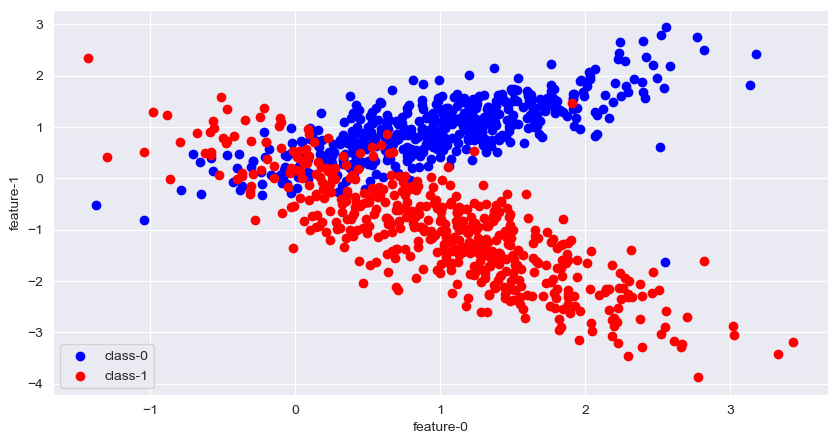

In [137]:
plt.figure(figsize=(10, 5))
scatter0 = plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue')
scatter1 = plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red')
plt.legend((scatter0, scatter1),
           ('class-0', 'class-1'),
           loc='lower left',
           ncol=1,
           fontsize=10)
plt.xlabel('feature-0')
plt.ylabel('feature-1')
plt.show()

In [152]:
features = ['feature-0', 'feature-1']
df_X = pd.DataFrame(X, columns=features)
df_y = pd.DataFrame(y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)
df

,feature-0,feature-1,target
0,1.536830,-1.398694,1
1,1.369176,-0.637344,1
2,0.502318,-0.459105,1
3,1.833193,-1.298082,1
4,1.042356,1.121529,0
...,...,...,...
995,0.535224,0.435245,1
996,1.069692,-0.129909,1
997,1.820267,-2.957167,1
998,1.004999,0.936290,0


In [153]:
df_train, df_test = train_test_split(df, random_state=123, test_size=0.2)
df_train.shape, df_test.shape

((800, 3), (200, 3))

In [154]:
model = LogisticRegression(random_state=123)
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train['target']
y_test = df_test['target']
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(mtr.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        94
           1       0.92      0.92      0.92       106

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

